In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler#for scaling the data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split#for spliting the data into training data and test data
import matplotlib.pyplot as plt
import pickle 
import seaborn as sns
import statsmodels.api as sm

In [2]:
data=pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
data.shape

(500, 9)

In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
# [0]is given as we cannot fill 2 numbers if there are 2 numbers in mode, so we only fill 1 number
# example - [1,2,2,3,3,4] here mode is[2,3] -mode[0]-2 only first number will be filled
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())

In [6]:
data.describe()
#check if NaN are filled or not
#serial no is a nominal data so we can delete 
#and we replaced toefl score and gre score with mean() and university rating with mode()-as university rating is between 1-5

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
data=data.drop(columns=['Serial No.'])

In [8]:
data.head()
#serial no is dropped

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


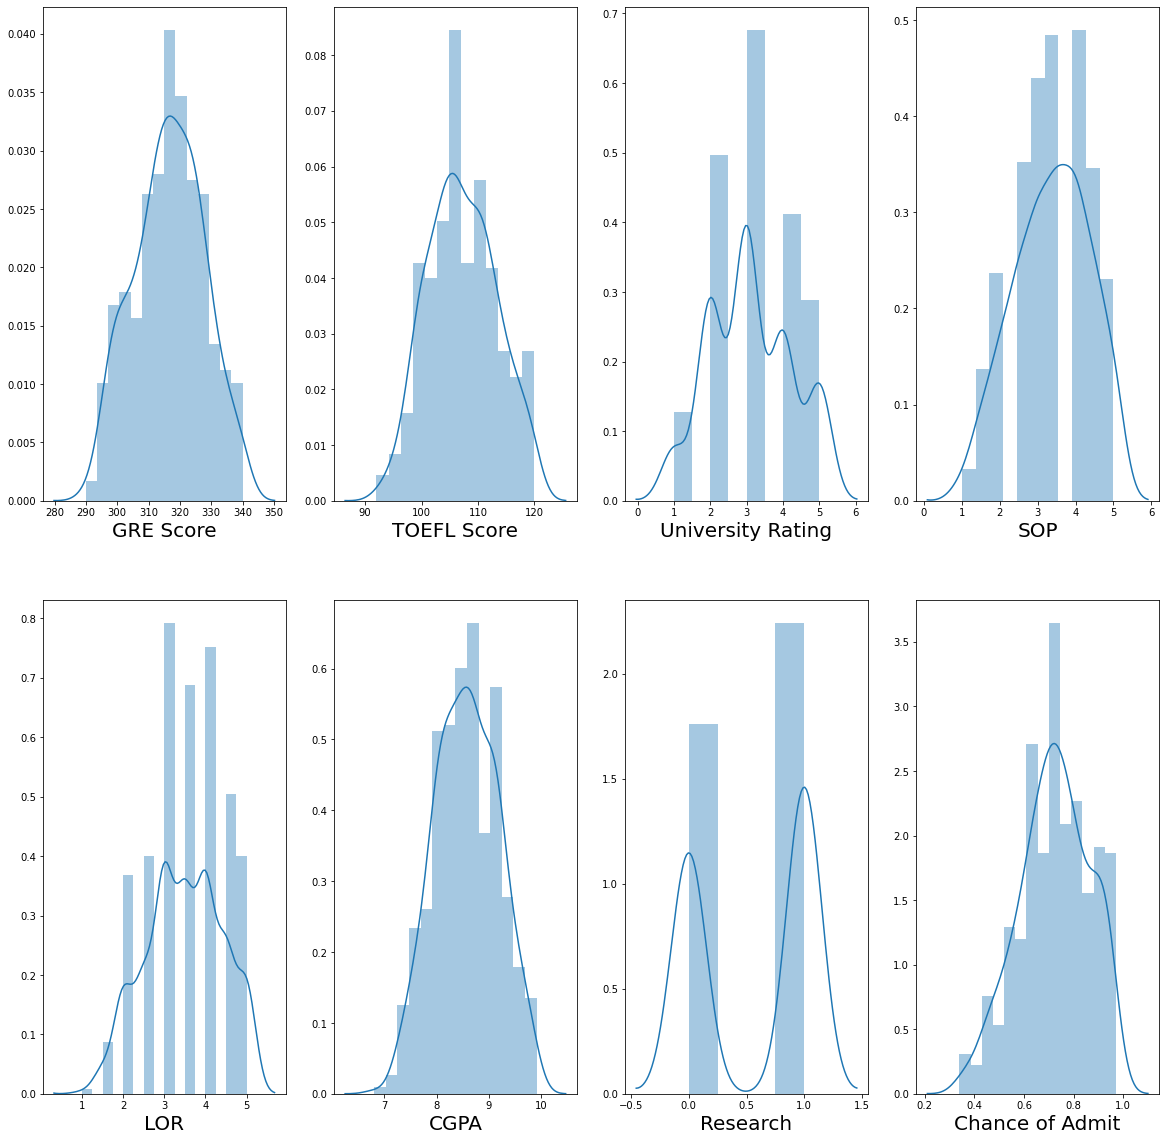

In [9]:
#describe if the data is in a normal distribution or not we need to visualize for that
plt.figure(figsize=(20,20))
plotnumber=1

for column in data:
    if plotnumber<=8: #as we have 8 columns
        ax=plt.subplot(2,4,plotnumber)# 2 is the no of rows and 4 is the number of fig per row-here we have 2 rows and 4 fig in each
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [10]:
# Divide the data into features and label
y=data['Chance of Admit']
x=data.drop(columns=['Chance of Admit'])
#y is the result and x is all the columns except result

In [11]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [12]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


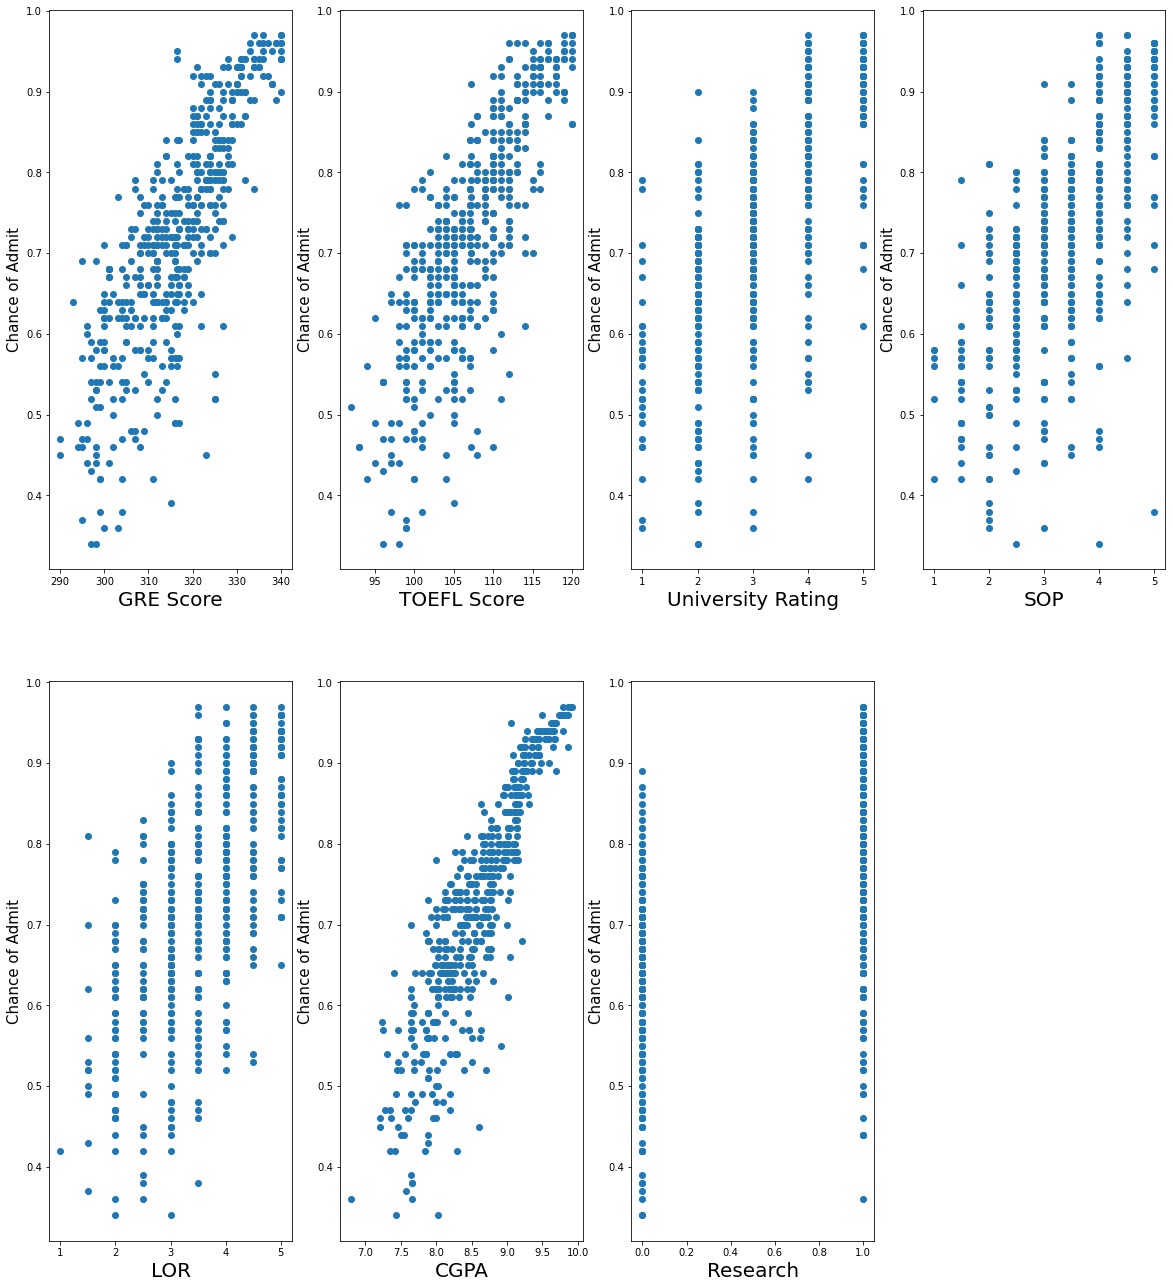

In [13]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=15)
    plotnumber+=1
    
plt.show()
    
# visualising the relationship between the featrures and label
#here it shows positive relation

In [14]:
#Data scaling. formula z=(x-mean)/std
Scaler=StandardScaler()
x_Scaled=Scaler.fit_transform(x)

In [15]:
x_Scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [16]:
#split the data into training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x_Scaled,y,test_size=0.25,random_state=323)
#random_state helps to give the same data everytime we use the same random_state num, instead of giving random data each time
y_train.head()

78     0.44
171    0.89
154    0.80
265    0.71
134    0.89
Name: Chance of Admit, dtype: float64

In [17]:
#training the model
Regression=LinearRegression()

In [18]:
Regression.fit(x_train, y_train)# data has been trained

LinearRegression()

In [19]:
#Predicting the data
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [20]:
print('Chance of Admission is:',Regression.predict(Scaler.transform([[345,100,3,4,4,7.5,0]]))) 
#in the array we have given the inputs similar to the previous inputs

Chance of Admission is: [0.62678025]


In [21]:
print('Chance of Admission is:',Regression.predict(Scaler.transform([[312,103,4,4,5,8.43,0]]))) 
#when we give the same the values, model is giving 70% close to actual data i.e. 73%

Chance of Admission is: [0.70602538]


In [24]:
#Saving the model for further use, we use pickle files here
filename='Finalized_model.pickle'
pickle.dump(Regression,open(filename,'wb'))#pickle.dump is to save #wb is to write data
Regression.fit(x_train, y_train)

LinearRegression()

In [25]:
loaded_model= pickle.load(open(filename,'rb'))#pickle.load to load the data #rb is to read data
loaded_model.fit(x_train, y_train)#here we fit the model once again to train the data

LinearRegression()

In [26]:
p=loaded_model.predict(Scaler.transform([[312,103,4,4,5,8.43,0]]))
p

array([0.70602538])

In [27]:
#adjusted rsquare
Regression.score(x_train,y_train) #.score() is the function for adjusted rsquare,one of the metrics of linear regression

0.8219512009081209

In [28]:
Regression.score(x_test,y_test) # value lies between 0 and 1

0.8125809128540746

In [31]:
y_pred=Regression.predict(x_test)

In [32]:
y_pred

array([0.72962282, 0.94684997, 0.64743246, 0.85308053, 0.84107013,
       0.78221847, 0.6106612 , 0.62446492, 0.82446077, 0.71827929,
       0.64798822, 0.79540446, 0.72911947, 0.50335167, 0.79205525,
       0.67869331, 0.51681922, 0.5769851 , 0.59484473, 0.82515732,
       0.78626585, 0.70727203, 0.60623517, 0.78739986, 0.78476073,
       0.85453737, 0.78162541, 0.58240106, 0.58323503, 0.72999217,
       0.68156254, 0.58627739, 0.5625913 , 0.7729838 , 0.65233795,
       0.62597992, 0.61721882, 0.76158331, 0.56214794, 0.83264717,
       0.75649261, 0.74754109, 0.62673314, 0.62605173, 0.9204128 ,
       0.70026047, 0.75127863, 0.63426177, 0.88137973, 0.99902269,
       0.60666463, 0.82387701, 0.88740287, 0.64678434, 0.76314902,
       0.72212229, 0.76349531, 0.49979327, 0.70701776, 0.87531165,
       0.48902332, 0.5994108 , 0.88167209, 0.63639462, 0.70772436,
       0.53824566, 0.70796217, 0.58568258, 0.7866568 , 0.76087021,
       0.77679018, 0.64071523, 0.90724871, 0.93808451, 0.88494

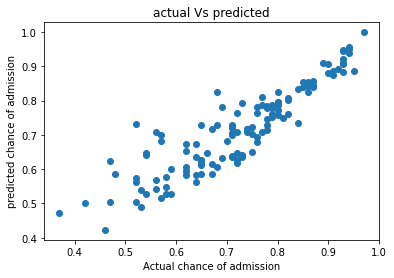

In [33]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel("predicted chance of admission")
plt.title("actual Vs predicted")
plt.show()

In [34]:
#model evaluation
#metrics for regression problem like mae,mse,rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
y_pred= Regression.predict(x_test)

In [36]:
mean_absolute_error(y_test,y_pred)#mean absolute error(MAE), avg error of the model

0.04350796028272816

In [37]:
mean_squared_error(y_test,y_pred)# mean squared error(MSE),larger errors are punished, popular than mae, doesnt have base units

0.00330589997182341

In [38]:
np.sqrt(mean_squared_error(y_test,y_pred)) #root mean squared error,most popular metric,easy to interpret have base units

0.05749695619616233

In [39]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV #RidgeCV and LassoCV returns the best learning rate
#cv= cross validation

In [41]:
LassCV=LassoCV(alphas=None,max_iter=1000,normalize=True)# alpha=learning rate=Lambda 
#LassoCV returns best alpha value after max iterations
#normalize is subtracting the mean and dividing by l2 normalization
LassCV.fit(x_train,y_train)

LassoCV(normalize=True)

In [43]:
alpha=LassCV.alpha_
alpha

2.301845632488045e-05

In [45]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.301845632488045e-05)

In [46]:
lasso_reg.score(x_test,y_test)

0.8125935793919128

In [55]:
#Ridge regression
RidgCV=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
#ridge returns the best alpha and co-efficients after performing 10 cross validations
RidgCV.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [49]:
RidgCV.alpha_

0.001

In [51]:
ridge_model=Ridge(alpha=RidgCV.alpha_)
ridge_model

Ridge(alpha=0.001)

In [53]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [54]:
ridge_model.score(x_test,y_test)

0.8125808709962027